## Instructions:
* Make a copy of this notebook and save it in your Google Drive. Use the "Save a copy in Drive" button in the File menu on the top left corner.
* Do not import any other additional libraries in question 1 and 2.
* Avoid using ChatGPT for direct assistance. Your independent implementation skills are being assessed.
* You may use the internet at your disposal to solve the questions in this assignment.
* Enter your code only where a **\[CODE BLOCK\]** is given.

## Question 1 (15 marks)

Gradient descent (GD) is an iterative first-order optimisation algorithm commonly used in machine learning (ML) and deep learning (DL) to minimise a cost/loss function (e.g. in a linear regression).

The fundamental concept is that we move in the direction opposite to the gradient of the cost function concerning a specific hyperparameter, either w or b.

Below is the code implemented for the Linear Regression algorithm.

* We generate regression data using the scikit_learn inbuilt library.
* We generate random weight matrices using the np.random.randn function.
* Apply the GD Algorithm :-
 * Calculate the output of the model.
 * Calculate the error. (Using the MSE Cost function)
 * Compute the gradient of the cost function wrt our hyperparameter.
 * Update theta.

Have a look at the code below and fill in the necessary blanks "...". Do not change any other part of the driver code.

Note:- Use the Mean Squared error as your cost function given as:

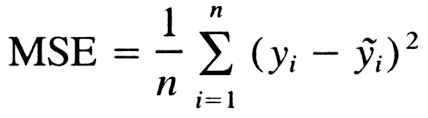

ybar is the predicted output.

In [5]:
!python -m pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# sklearn.datasets.make_regression is a function in scikit-learn that generates
# a random regression dataset with specified parameters, such as the number of
# samples, number of features, and level of noise.

X, y = make_regression(n_samples=100, n_features=1, noise=10)

In [7]:
def gradient_descent(X, y, learning_rate, num_iterations):
    # Initializing our only parameter theta (our weight matrix)
    theta = np.random.randn()
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        
        y_pred = X.flatten() * theta               # [4] Predicted output using current theta
        error = y_pred - y                         # [5] Difference between predicted and true y

        gradient = (2/m) * np.dot(X.flatten(), error)  # [6] Derivative of cost w.r.t. theta

        theta = theta - learning_rate * gradient   # [7] Update theta to reduce cost

        cost = (1/m) * np.sum(error ** 2)          # [8] Compute MSE cost
        cost_history.append(cost)                  # [9] Save cost to plot later

    return theta, cost_history

    


In [9]:
# Set the learning rate and number of iterations
learning_rate = 0.001
num_iterations = 10000

# Call the gradient_descent function and store the results
theta, cost_history = gradient_descent(X, y, learning_rate, num_iterations)

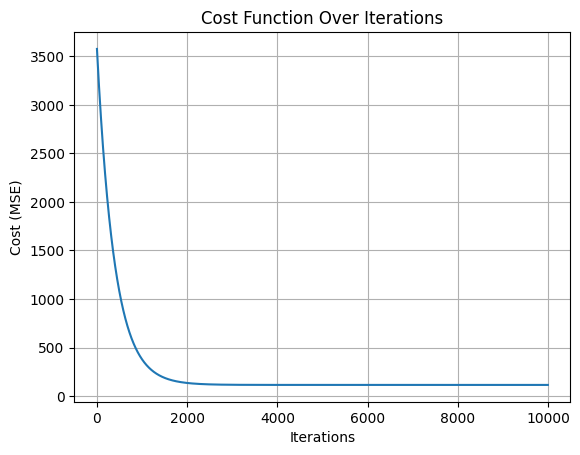

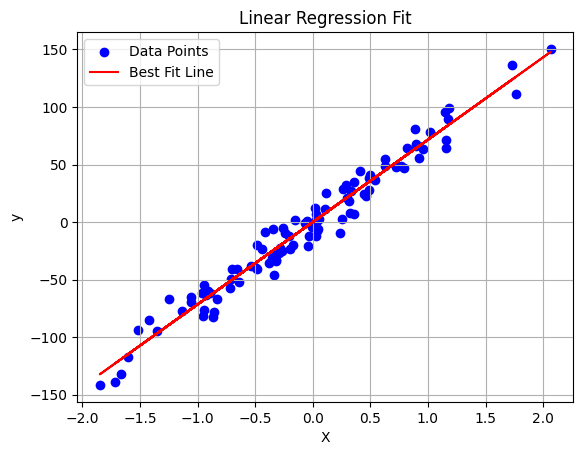

In [10]:
# Plot the cost function over iterations

# [CODE BLOCK]

plt.plot(range(num_iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Over Iterations')
plt.grid(True)
plt.show()


# Plot the best fit line

# [CODE BLOCK]

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the line using the final theta
plt.plot(X, X * theta, color='red', label='Best Fit Line')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


## Question 2 (25 marks)

The Logistic Regression algorithm shares similarities with Linear Regression, except for the incorporation of a sigmoid activation function. Additionally, instead of the Mean Squared Error (MSE) cost function, Logistic Regression employs the Binary Cross-Entropy cost function (can refer to the internet).


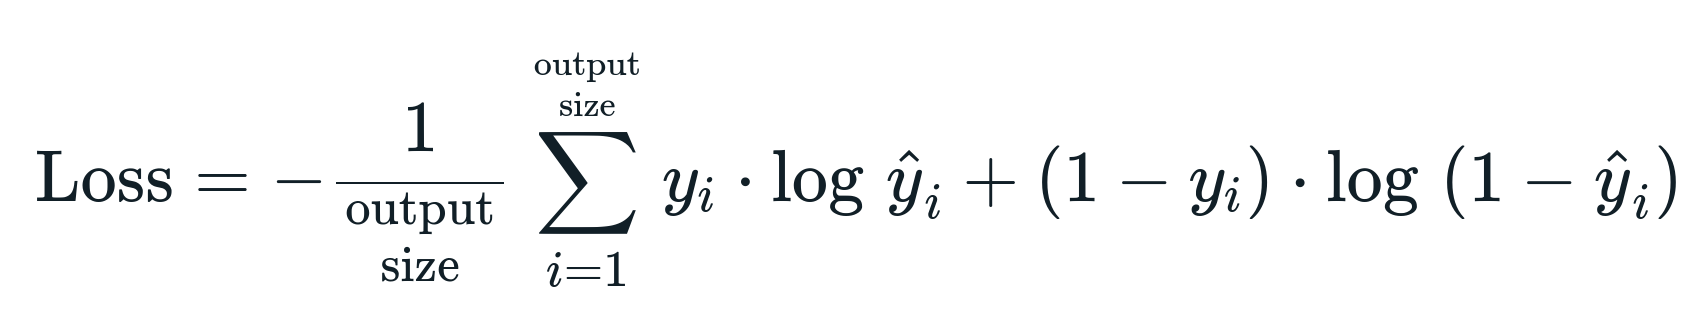

In [14]:
from sklearn.datasets import make_classification

In [15]:
# Generate random classification data using scikit-learn
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(z):
    # return the sigmoid activation function for the input z.
    return 1 / (1 + np.exp(-z))

    # [CODE BLOCK]

def logistic_regression(X, y, learning_rate, num_iterations):
    # Initializing parameters w1 and w2
    w1 = np.random.randn()
    w2 = np.random.randn()
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        # Calculate sigmoid

        # [CODE BLOCK]

        z = w1 * X[:, 0] + w2 * X[:, 1]
        y_pred = sigmoid(z) 

        # Calculate the error using the Binary Cross Entropy loss function
        error = y_pred - y

        # Calculate the gradient

        # [CODE BLOCK]
        gradient_w1 = (1/m) * np.dot(error, X[:, 0])  # [CODE BLOCK]
        gradient_w2 = (1/m) * np.dot(error, X[:, 1])  # [CODE BLOCK]

        # Update parameters using gradient descent
        w1 -= learning_rate * gradient_w1
        w2 -= learning_rate * gradient_w2

        # Calculate and append the cost at the end of cost_history

        # [CODE BLOCK]
        cost = -(1/m) * np.sum(y * np.log(y_pred + 1e-15) + (1 - y) * np.log(1 - y_pred + 1e-15))  # [CODE BLOCK]
        cost_history.append(cost)

    return w1,w2, cost_history




In [17]:
# Set the learning rate and number of iterations
learning_rate = 0.0025
num_iterations = 10000

# Call the logistic_regression function and store the results
w1,w2, cost_history = logistic_regression(X, y, learning_rate, num_iterations)


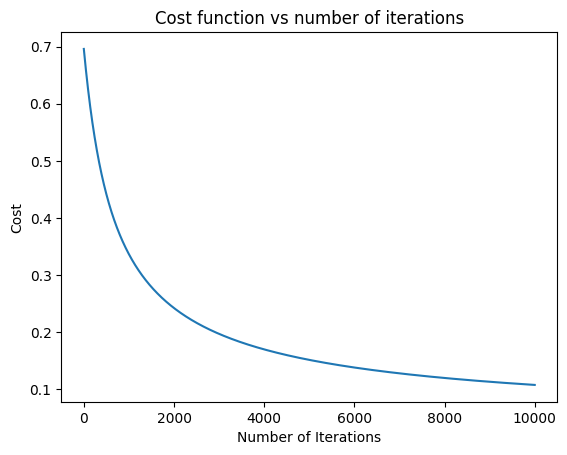

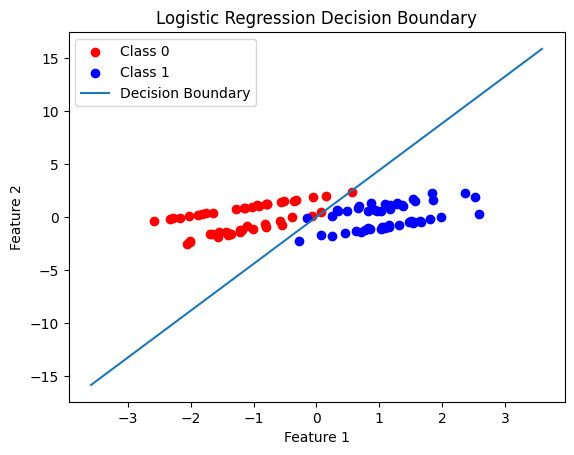

In [18]:

# Plot the cost function over iterations
plt.plot(np.arange(num_iterations), cost_history)
plt.title('Cost function vs number of iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

# BONUS POINTS IF YOU ARE ABLE TO PLOT THE DECISION BOUNDARY.

# Plot data points
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='red', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')

# Plot decision boundary: w1 * x1 + w2 * x2 = 0
x_values = np.array([X[:,0].min() - 1, X[:,0].max() + 1])
y_values = -(w1 / w2) * x_values  # rearranged from w1*x1 + w2*x2 = 0

plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Logistic Regression Decision Boundary')
plt.show()




## Question 3 (10 marks)

Your task is to create a Pandas pipeline that preprocesses a DataFrame by performing the following transformations: imputing missing values using mean, scaling numeric features to zero mean and unit variance. You are expected to implement a class named DataPreprocessor that encapsulates the functionality of this preprocessing pipeline. Your implementation should include the following attributes and functions:

Attributes:  
* None

Functions:  
* preprocess_data(self, df):  
Applies preprocessing transformations to the DataFrame df and returns the processed DataFrame.  
 * Parameters:  
    * df: The input DataFrame to be preprocessed.  
  * Returns:  
    * processed_df: The preprocessed DataFrame with imputed missing values, scaled numeric features, and one-hot encoded categorical variables.  

In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

class DataPreprocessor:
    def __init__(self):

        # [CODE BLOCK]
        self.pipeline = self._create_pipeline()

    def _create_pipeline(self):

        # [CODE BLOCK]
        numeric_features = ['age', 'salary']
        numeric_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),    
            ('scaler', StandardScaler())                     
        ])

        
        categorical_features = ['gender', 'education']
        categorical_transformer = Pipeline(steps=[
            ('encoder', OneHotEncoder(drop=None, sparse_output=False))
        ])

        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ]
        )

        return preprocessor

    def preprocess_data(self, df):
        return pd.DataFrame(self.pipeline.fit_transform(df), columns=['age', 'salary', 'gender_F', 'gender_M', 'education_Bachelor', 'education_Master', 'education_PhD'])

Now convert the **data** dictionary into a dataframe and apply the preprocessing pipeline to this dataframe

In [20]:
data = {'age': [25, 30, None, 35, 56, 78, 23, None],
        'salary': [50000, None, 60000, 70000, 28902, 43009, None, 10000],
        'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'F', 'F'],
        'education': ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Bachelor', 'Bachelor', 'PhD', 'Master']}
df = pd.DataFrame(data)

# Initialize DataPreprocessor object
preprocessor = DataPreprocessor()

# Apply preprocessing pipeline to the DataFrame
processed_df = preprocessor.preprocess_data(df)
print(processed_df)


        age    salary  gender_F  gender_M  education_Bachelor  \
0 -0.947131  0.370217       0.0       1.0                 1.0   
1 -0.654204  0.000000       1.0       0.0                 0.0   
2  0.000000  0.953403       0.0       1.0                 0.0   
3 -0.361277  1.536590       1.0       0.0                 1.0   
4  0.869017 -0.860190       0.0       1.0                 1.0   
5  2.157895 -0.037489       1.0       0.0                 1.0   
6 -1.064301  0.000000       1.0       0.0                 0.0   
7  0.000000 -1.962530       1.0       0.0                 0.0   

   education_Master  education_PhD  
0               0.0            0.0  
1               1.0            0.0  
2               0.0            1.0  
3               0.0            0.0  
4               0.0            0.0  
5               0.0            0.0  
6               0.0            1.0  
7               1.0            0.0  


## Question 4  (_10 Brownie points for this question_)

Your team is tasked with building a Machine Learning pipeline for a reputed MNC. Your Manager assigns you the task of making an interactive plot to display the data obtained for various sources in a niche manner.


Here, implement an interactive matplotlib plot where clicking on a point displays the corresponding coordinates and category label from a pandas DataFrame.

You are expected to furnish the following deliverables post attempting this question:

> 1) A custom function which named "on_plot_click" with "sel" as a keyword parameter. This function serves as a callback function which is called whenever the user clicks at a datapoint on the plot.

> 2) An interactive **scatter** plot which displays the coordinates and category labels of that point.


Make sure you first create a DataFrame with 2 columns of numerical and categorical data each. You may use the dataFrame created in question 3 for this purpose.

_Hint_ : \
1) Explore the documentation of a python library called mplcursors [here](https://mplcursors.readthedocs.io/en/stable/).

2) 'None' values in data make many people cut a sorry figure. So you better impute them.

usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: dejavu events execute kernel kernelspec lab
labextension labhub migrate nbconvert notebook run server troubleshoot trust

Jupyter command `jupyter-nbextension` not found.


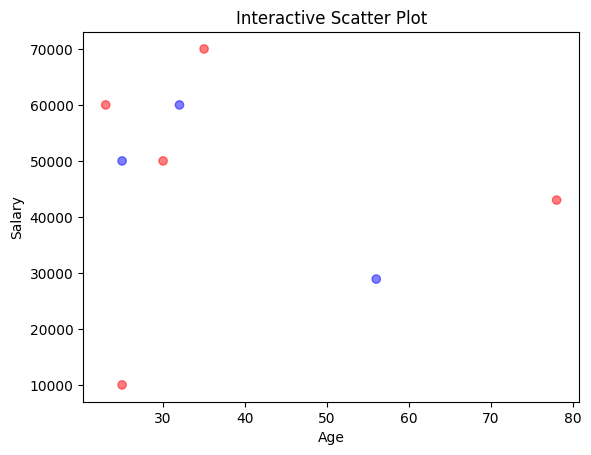

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import mplcursors

# !python -m pip install ipympl

# Enable ipywidgets
!jupyter nbextension enable --py widgetsnbextension

# Use the magic command to enable matplotlib widget mode in Colab
%matplotlib inline

# from google.colab import output
# output.enable_custom_widget_manager()

# Create DataFrame
data = {'age': [25, 30, 32, 35, 56, 78, 23, 25],
        'salary': [50000, 50000, 60000, 70000, 28902, 43009, 60000, 10000],
        'gender': ['M', 'F', 'M', 'F', 'M', 'F', 'F', 'F'],
        'education': ['Bachelor', 'Master', 'PhD', 'Bachelor', 'Bachelor', 'Bachelor', 'PhD', 'Master']}
df = pd.DataFrame(data)

# Create figure and axis
fig, ax = plt.subplots()

# Plot data
scatter = ax.scatter(df['age'], df['salary'], c=df['gender'].map({'M': 'blue', 'F': 'red'}), alpha=0.5)

# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Salary')
ax.set_title('Interactive Scatter Plot')

def on_plot_click(sel):
    index = sel.index  # gets the index of the clicked point
    row = df.iloc[index]
    sel.annotation.set_text(
        f"Age: {row['age']}\nSalary: {row['salary']}\nGender: {row['gender']}\nEducation: {row['education']}"
    )

# code for connecting the cursor here. (Note : The callback for the cursor is created above) :

cursor = mplcursors.cursor(scatter, hover=True)
cursor.connect("add", on_plot_click)


# display the interactive scatter plot :

# [CODE BLOCK]
plt.show()

